# Data Science Salaries Analysis

## Steps involved in this analysis
    

### 1. Importing packages
### 2. loading csv file 
### 3. Data cleaning 
### 4. Data preprocessing
### 5. Data visualization
       

You can also see my Tableau dashboards : https://public.tableau.com/app/profile/moguloju.sai/viz/DataScienceSalariesAnalysis_17129823415870/Dashboard1

In [1]:
# import packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# loading csv file
df = pd.read_csv("ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
# shape of the dataset
df.shape

(607, 12)

In [7]:
# columns in dataset
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [8]:
# grouping experience level and salary in usd
df.groupby('experience_level')['salary_in_usd'].mean().sort_values()

experience_level
EN     61643.318182
MI     87996.056338
SE    138617.292857
EX    199392.038462
Name: salary_in_usd, dtype: float64

In [9]:
# grouping experience level and salary
df.groupby('experience_level')['salary'].mean().sort_values()

experience_level
SE    213949.353571
EN    264622.454545
EX    427072.115385
MI    480617.690141
Name: salary, dtype: float64

Count Employment Type FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64


<Axes: >

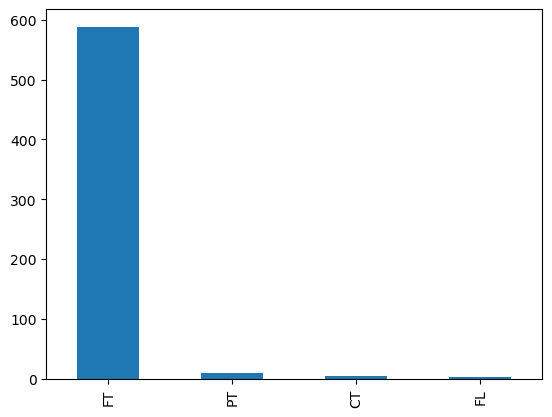

In [10]:
count_employment_type = df['employment_type'].value_counts()
print('Count Employment Type', count_employment_type)
df['employment_type'].value_counts().plot.bar() 

In [11]:
# grouping job title and salary in usd
df.groupby('job_title')['salary_in_usd'].max().sort_values(ascending=False)

job_title
Principal Data Engineer                     600000
Financial Data Analyst                      450000
Research Scientist                          450000
Applied Machine Learning Scientist          423000
Principal Data Scientist                    416000
Data Scientist                              412000
Data Analytics Lead                         405000
Applied Data Scientist                      380000
Director of Data Science                    325000
Data Engineer                               324000
Lead Data Engineer                          276000
ML Engineer                                 270000
Data Architect                              266400
Machine Learning Scientist                  260000
Machine Learning Engineer                   250000
Data Science Manager                        241000
Head of Data                                235000
Head of Data Science                        224000
Analytics Engineer                          205300
Data Analyst         

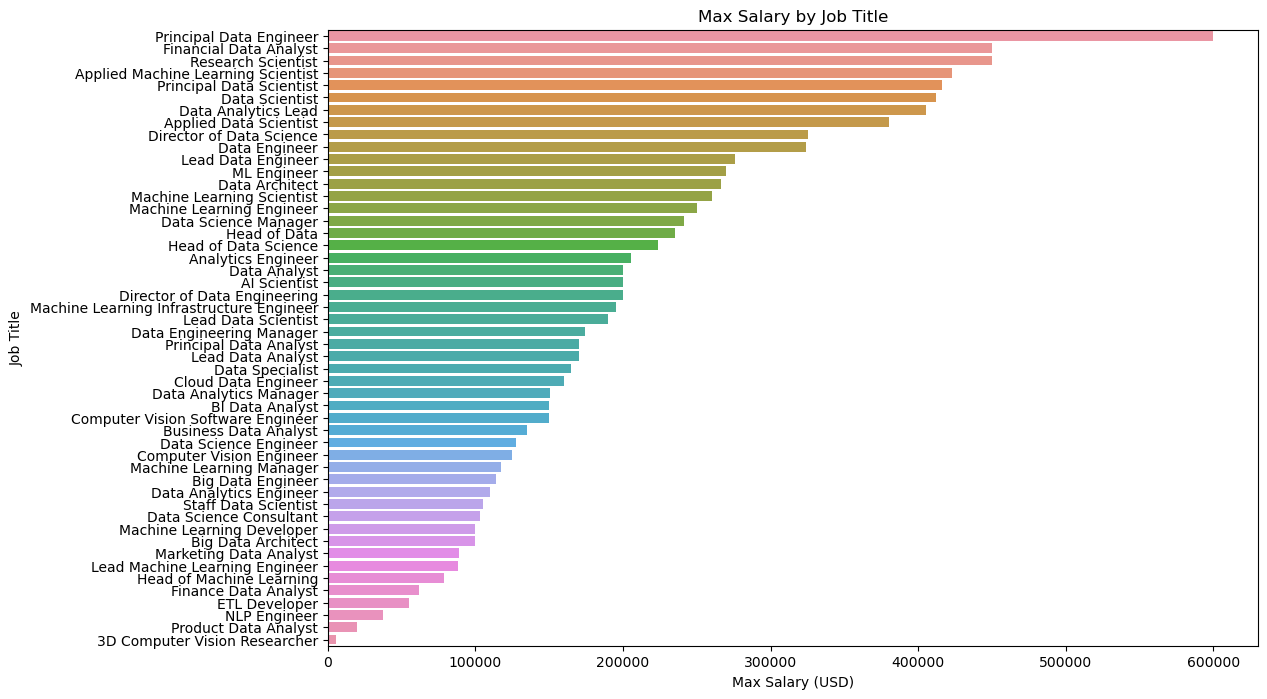

In [12]:
max_salary = df.groupby('job_title')['salary_in_usd'].max().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=max_salary.values, y=max_salary.index)
plt.title('Max Salary by Job Title')
plt.xlabel('Max Salary (USD)')
plt.ylabel('Job Title')
plt.show()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

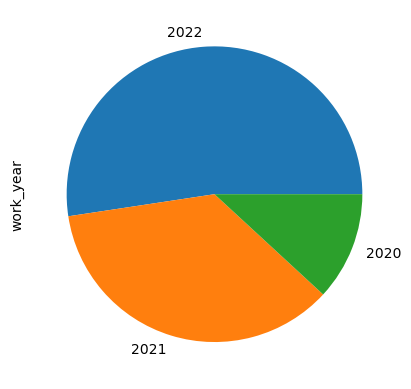

In [13]:
# pie chart of work year
df['work_year'].value_counts().plot.pie()
df['work_year'].value_counts()

M    326
L    198
S     83
Name: company_size, dtype: int64

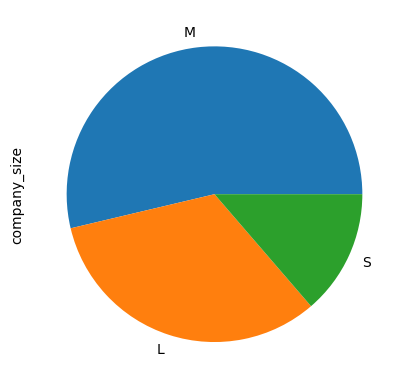

In [14]:
# pie chart of company size
df['company_size'].value_counts().plot.pie()
df['company_size'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

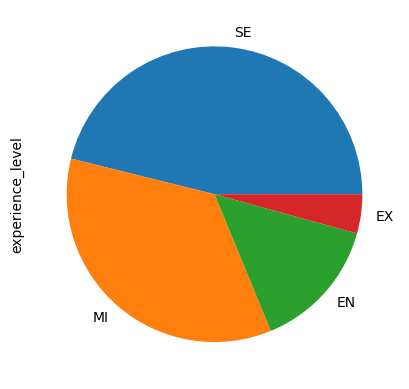

In [15]:
# pie chart of experience level
df['experience_level'].value_counts().plot.pie()
df['experience_level'].value_counts()

In [16]:
# grouping experience level and job title
df.groupby(['experience_level','job_title']).size().reset_index(name='count')

,experience_level,job_title,count
0,EN,AI Scientist,4
1,EN,Applied Data Scientist,1
2,EN,Applied Machine Learning Scientist,1
3,EN,BI Data Analyst,2
4,EN,Big Data Engineer,3
...,...,...,...
100,SE,Principal Data Analyst,1
101,SE,Principal Data Engineer,2
102,SE,Principal Data Scientist,5
103,SE,Research Scientist,5
